In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("../Datasets/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
X = df.drop(['species'], axis=1)
y = df['species']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [26]:
clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)

array(['versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'virginica', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'versico

In [27]:
y_pred = clf.predict(X_test)

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [29]:
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
cm_df

,SETOSA,VERSICOLR,VIRGINICA
SETOSA,16,0,0
VERSICOLR,0,17,1
VIRGINICA,0,0,11


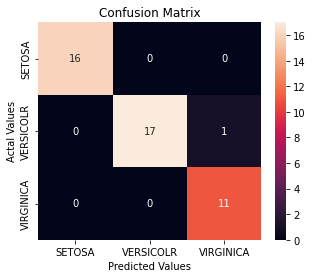

In [30]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# 1 Setosa

##  TP, TN, FP, FN values for the class Setosa

## TP = 16 (cell 1)
## FN = 0 + 0 = 0 (cell 2 + cell 3)
## FP = 0 + 0 = 0 (cell 4 + cell 7)
## TN = 17 + 1 +0 + 11 = 29 (cell 5 + cell 6 + cell 8 + cell 9)

# 2 Versicolor

## TP : 17 (cell 5)

## FN : 0 + 1 = 1 (cell 4 +cell 6)

## FP : 0 + 0 = 0 (cell 2 + cell 8)

## TN : 16 +0 +0 + 11 =27 (cell 1 + cell 3 + cell 7 + cell 9)


# 3 Virginia

## TP : 19 (cell 9)

## FN : 0 + 1 = 1 (cell 7 +cell 8)

## FP : 0 + 0 = 0 (cell 3 + cell 6)

## TN : 16 +0 +0 + 11 =27 (cell 1 + cell 2 + cell 4 + cell 5)